# Regression in Scikit-Learn

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# instead of import whole library we can do this
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
# simple linear regression - Assumptions (both variables must be numeric)
# x = df[['age']]
# y = df['fare']

In [5]:
# # checking null values in x and y
# x.isnull().sum()/len(x)*100
# y.isnull().sum()/len(y)*100
# y has no null values

In [6]:
# selecting age and fare columns only
df_linear = df[['age','fare']]
df_linear

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
886,27.0,13.0000
887,19.0,30.0000
888,NaN,23.4500
889,26.0,30.0000


In [7]:
df_linear.age.fillna(value=df_linear['age'].mean(), inplace=True)
# now shapes of both x and y are same
df_linear

C:\Users\Asim Mehdi\AppData\Local\Temp\ipykernel_11708\202282216.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_linear.age.fillna(value=df_linear['age'].mean(), inplace=True)


,age,fare
0,22.000000,7.2500
1,38.000000,71.2833
2,26.000000,7.9250
3,35.000000,53.1000
4,35.000000,8.0500
...,...,...
886,27.000000,13.0000
887,19.000000,30.0000
888,29.699118,23.4500
889,26.000000,30.0000


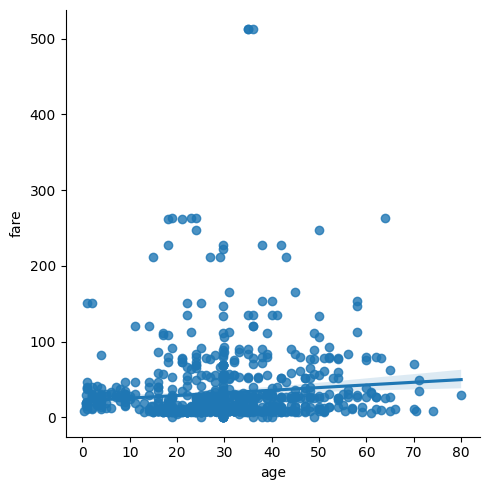

In [8]:
# checking plot
sns.lmplot(data= df_linear, x= 'age', y='fare')

<Axes: ylabel='age'>

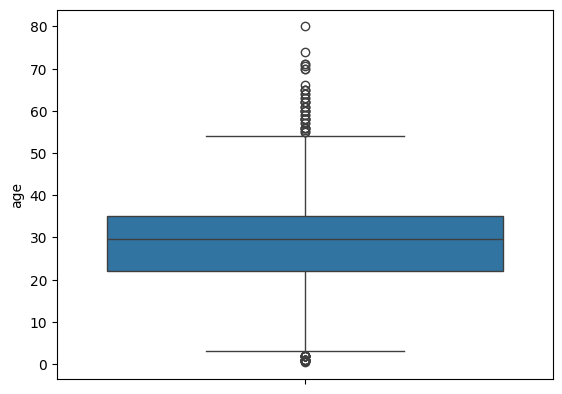

In [9]:
# removing outliers from age
sns.boxplot(data=df_linear, y='age')

In [10]:
df_linear = df_linear[(df_linear['age']>3)&(df_linear['age']<55)]

In [11]:
df_linear.shape

(819, 2)

In [12]:
df_linear = df_linear[(df_linear['age']>8)&(df_linear['age']<50)]
df_linear.shape
# age okay now

(763, 2)

<Axes: ylabel='fare'>

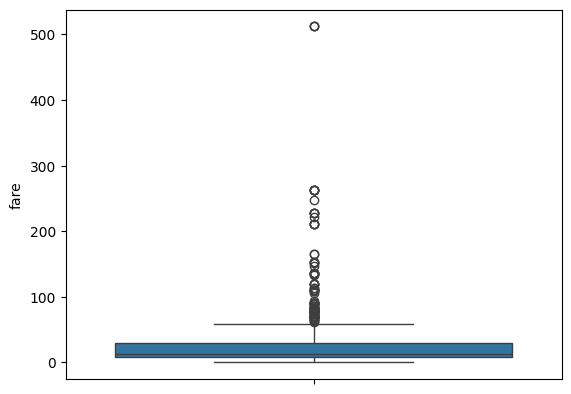

In [13]:
sns.boxplot(data=df_linear, y='fare')

In [14]:
df_linear = df_linear[(df_linear['fare']>1)&(df_linear['fare']<35)]
df_linear.shape

(589, 2)

In [15]:
# defining x and y to make the plot >>>>>>>>>> y = a+xb
x = df_linear[['age']]
y = df_linear['fare']

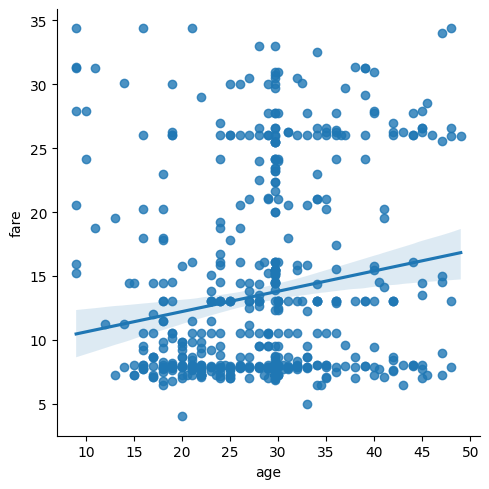

In [16]:
# checking plot again
sns.lmplot(data= df_linear, x= 'age', y='fare')

### Going towards linear regression model

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# call model
model = LinearRegression()
#train model 
model.fit(x,y)
# prediction
model.predict([[60]])

c:\Users\Asim Mehdi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([18.57470754])

#### Model evaluation to check how much the model is predicting correctly 

In [18]:
# Model evaluation with metrics:
# r2
# mean squared error
# mean absolute error
# root mean square error

# divide data of x and y into two portions with 20% train:80% test
x_train, x_test , y_train, y_test = train_test_split(x,y, train_size=0.8)

# to check the split 
print(y_train.shape)
print(y_test.shape)

# prepare model to train
model_train = LinearRegression()
# train 
model_train.fit(x_train, y_train)
#prediction
predictions = model_train.predict(x_test)

(471,)
(118,)


<Axes: xlabel='fare'>

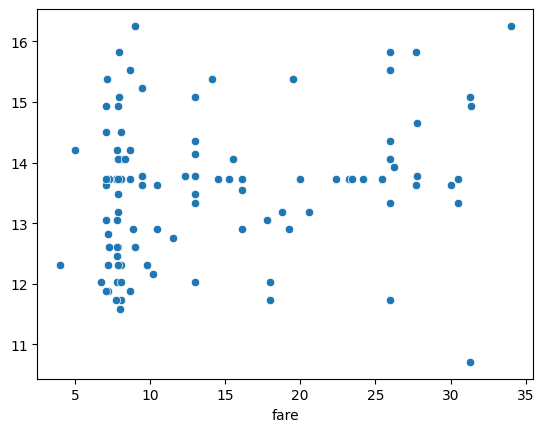

In [75]:
# compare
sns.scatterplot(x=y_test,y=predictions)
# as the visual below shows evaluation is not accurate as per linear regression

In [76]:
# finding accuracy with score base
model_train.score(x_test,y_test)
# the result shows more accuracy if it is near 1. this prediction is not accurate

0.037344105144186956

In [86]:
# finding accuracy with metrics
from sklearn.metrics import mean_squared_error , mean_absolute_error, r2_score
# print(mean_absolute_error(y_true=y_test, y_pred=predictions))
# print(mean_squared_error(y_true=y_test, y_pred=predictions))
# print(r2_score(y_true=y_test, y_pred=predictions))

MAE = mean_absolute_error(y_true=y_test, y_pred=predictions)
MSE = mean_squared_error(y_true=y_test, y_pred=predictions)
RMSE = mean_squared_error(y_true=y_test, y_pred=predictions, squared=False)
R2 = r2_score(y_true=y_test, y_pred=predictions)

print("MAE: ",MAE,'\n'"MSE: ",MSE,'\n'"RMSE: ",RMSE,'\n'"R_squared: ",R2)

# we can also find RMSE by just doing, RMSE = np.sqrt(MSE) by importing numpy

MAE:  6.565585590037905 
MSE:  60.14693434035799 
RMSE:  7.755445463695685 
R_squared:  0.037344105144186956


c:\Users\Asim Mehdi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
# Assignment: multi regression on the iris dataset